- 참고문헌
  - https://paper-garden.tistory.com/35#%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%A4%80%EC%A0%84%EB%AC%B8%EA%B0%80_3%EA%B3%BC%EB%AA%A9_%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%EC%9D%98_%EC%9D%B4%ED%95%B4_%EB%82%B4%EC%9A%A9_%EC%9A%94%EC%95%BD_
  - https://blog.naver.com/algosn/221253539965

### 선형회귀분석

#### 경사하강법 (gradient Descent)
- Y=4X+6이 실제값 일 때, y = 4X + 6 식을 근사(w1=4, w0=6)하고 noise가 있는 random 값을 데이터로 만들어서 최적의 회귀계수를 찾아가도록 해본다

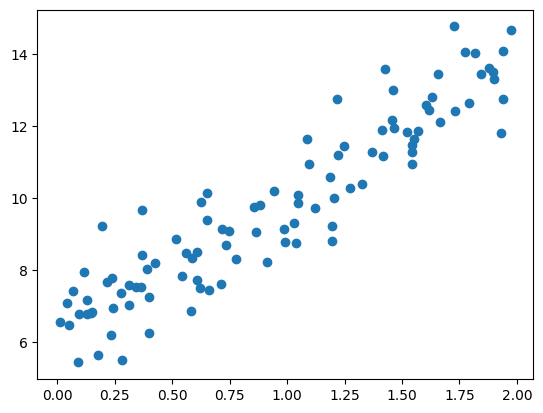

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) # seed를 사용하면 실행마다 동일한 셋트의 난수가 나타나게 할 수 있음
# y=4x+6 식을 근사(w1=4,w=0.6).random값은 noise를 위해 만듦
X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)

# X,y 데이터 셋 sacatter plot으로 시각화
plt.scatter(X,y)


이 코드는 파이썬에서 NumPy와 Matplotlib 라이브러리를 사용하여 데이터 시각화를 수행하는 예시입니다.

코드의 첫 부분에서는 NumPy의 random 모듈을 사용하여 시드값을 42로 설정합니다. 이는 실행할 때마다 같은 결과가 나오도록 설정하는 것입니다.

다음으로, y=4x+6의 식을 근사하기 위해 100개의 x값을 0과 2사이의 랜덤값으로 생성하고, 이에 대응하는 y값을 계산합니다. 이 때, y값은 평균이 0, 표준편차가 1인 정규분포에서 랜덤값을 추가로 생성하여 noise를 만들어줍니다.

마지막으로, Matplotlib의 scatter 함수를 사용하여 X와 y 데이터셋을 산점도로 시각화합니다. 이를 통해 데이터의 분포를 살펴볼 수 있습니다.

1. 일반경사하강법

In [12]:
# w1과 w0을 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1,w0,X,y, learning_rate=0.01):
    N=len(y) # y=w0+W1*x1
    # 먼저 w1_update.w0_update를 각각 w1.w0의 shape와 동일한 크기를 가진 0값으로 최기화
    w1_update=np.zeros_like(w1) # 벡터크기에 따라서 0 mapping 시켜줘
    w0_update=np.zeros_like(w0)
    # 예측배열 계산하고 예측과 실제값의 차이 계산
    y_pred=np.dot(X,w1.T)+w0 # np.matmul써도되지만, 어차피 벡터 계산이기 때문에 dot를 씀
    # y=ax+b -> no.dot(X,w1.T)
    diff=y-y_pred # error function= 실제값-예측값
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors=np.ones((N,1)) # 초기값 ones로 셋팅 N크기만큼 받아들이고

    # w1과 w0을 업데이트 할 w1_update와 w0_update
    w1_update=-(2/N)*learning_rate*(np.dot(X.T, diff)) # error ftn : mse(mean square error)
    # summation_i^n(y-y_hat)(-x_i)
    w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T, diff)) # summaion_i^n(y-y_hat)-(x_1)

    return w1_update, w0_update # W_0.W_1 update

In [13]:
# 입력인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X,y,iters=10000):
# w0과 w1을 모두 0으로 초기화
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))

# 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        # learning_rate : 사람이 정하는 파라미터, 정해져있지않음
        # 보통 10^(-2)~10^(-6) 절대적으로 정해져있지않음
        w1=w1-w1_update # w1(왼쪽에있는)->new, w1(오른쪽에있는)->old
        # w1_update=gradient descent 방법
        # new=old-update(update=0->new=old) # 최적의 값을 찾음
        w0=w0-w0_update
    return w1,w0

In [14]:
def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    print(cost)
    return cost

In [15]:
w1,w0=gradient_descent_steps(X,y,iters=1000) #1000번을 반복
# 최적의 값을 뽑고 그때의 cost 값을 출력
print('w1:{0:.3f} W0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total cost:{0:.4f}'.format(get_cost(y,y_pred)))


w1:3.818 W0:6.161
0.8074693923777707
Gradient Descent Total cost:0.8075


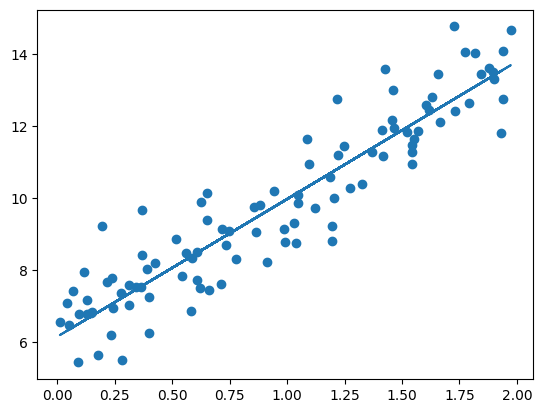

In [16]:
plt.scatter(X,y)
plt.plot(X,y_pred)

data가 적으면 gradient descent 방법을 사용할텐데, data가 굉장히 큼.
-> 미분자체가 계산량이 많아짐 / 변수가 많아서 미분이 많아짐

통계에서는 모집단(전체) -> 표본(sample) 통계량 혹은 결론

stochasti

Sklearn 데이터셋 활용  
Bulid-in dataset  

load_boston: 보스톤 집값 데이터  
load_iris: 아이리스 붓꽃 데이터  
load_diabetes: 당뇨병 환자 데이터  
load_digits: 손글씨 데이터  
load_linnerud: multi-output regression 용 데이터  
load_wine: 와인 데이터  
load_breast_cancer: 위스콘신 유방암 환자 데이터  
Sklearn Linear Regression Tutorial with Boston House Dataset  



Boston house dataset은 1.0부터 사라짐. 버전 downgrade가 필요.  

In [18]:
import sklearn
print(sklearn.__version__)

1.0.2


In [22]:
import numpy as np
import pandas as pd
# Visualization Libraries
import seaborn as sns
# seaborn=그래프를 통계적으로 그리는 패키지
import matplotlib.pyplot as plt
# import package(함수를 전부 가져옴)
# from package import module(패키지 안의 특정 함수를 가져옴)
from sklearn import datasets
from sklearn.linear_model import LinearRegression
# from sklearn.-> .은 속성으로 들어가주세요
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
# to plot the graph embedded in the note book
%matplotlib inline

In [23]:
#loading the dataset direclty from sklearn
#import sklearn
#boston = sklearn.datasets.load_boston()
boston = datasets.load_boston()

In [25]:
print(type(boston))
print('\n') # 엔터(줄바꿈)
print(boston.keys())
print('\n')
print(boston.data.shape)
print('\n')
print(boston.feature_names)

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


(506, 13)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [41]:
bos=pd.DataFrame(boston.data, columns=boston.feature_names) # 행과 열에 접근하기 위해 데이터 변경
bos['PRICE']=boston.target
print(bos.head()) # 위에서부터 5개, default=다섯개
print(bos.tail()) # 밑에서부터 5개

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0  \
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0  \
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3

In [42]:
bos.isnull().sum() # 결측치 확인
# bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [43]:
bos.describe() # 요약통계량

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [44]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


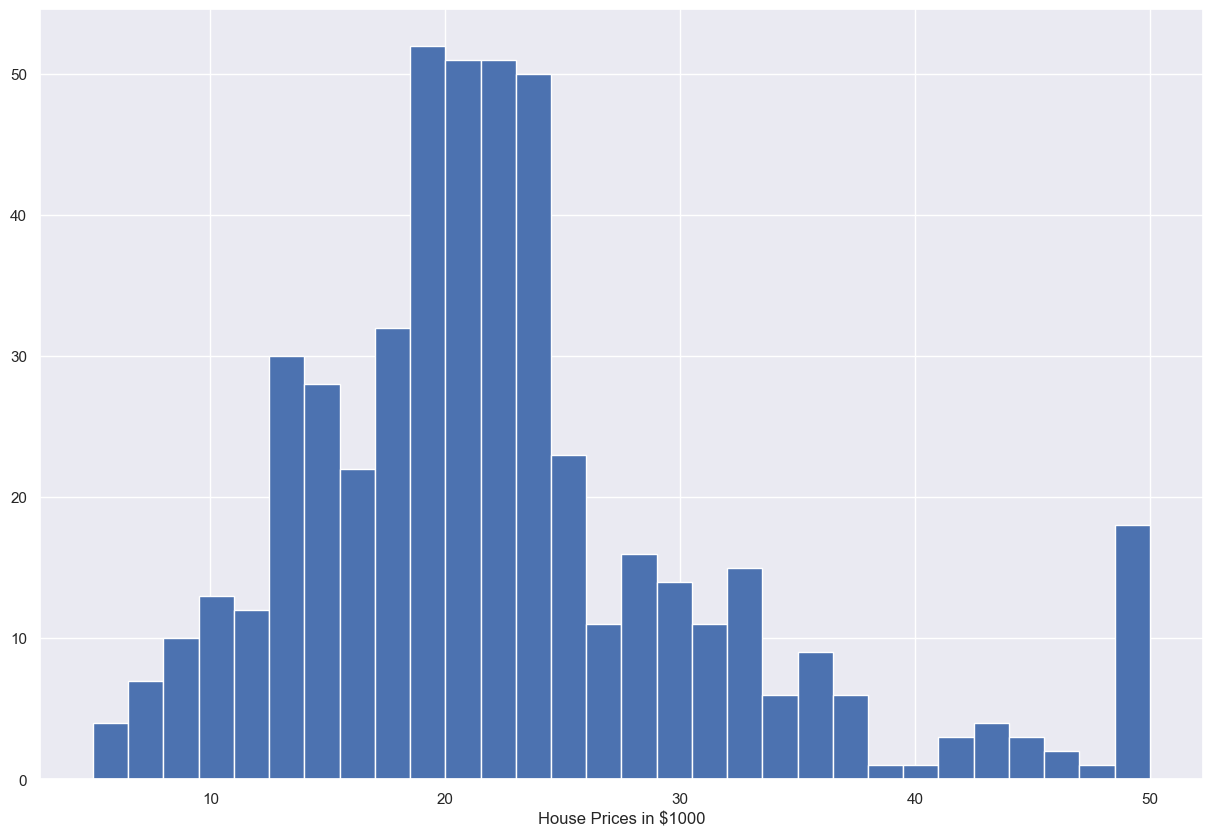

In [45]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)}) #Price에 대해 그림을 그림.
#figure.figsize : 크기를 어떻게 할꺼냐?
plt.hist(bos['PRICE'],bins=30) # hist-> 히스토그램 bins=막대 몇개?
plt.xlabel('House Prices in $1000') #x축
plt.show() #그림을 그리시오.

<Axes: >

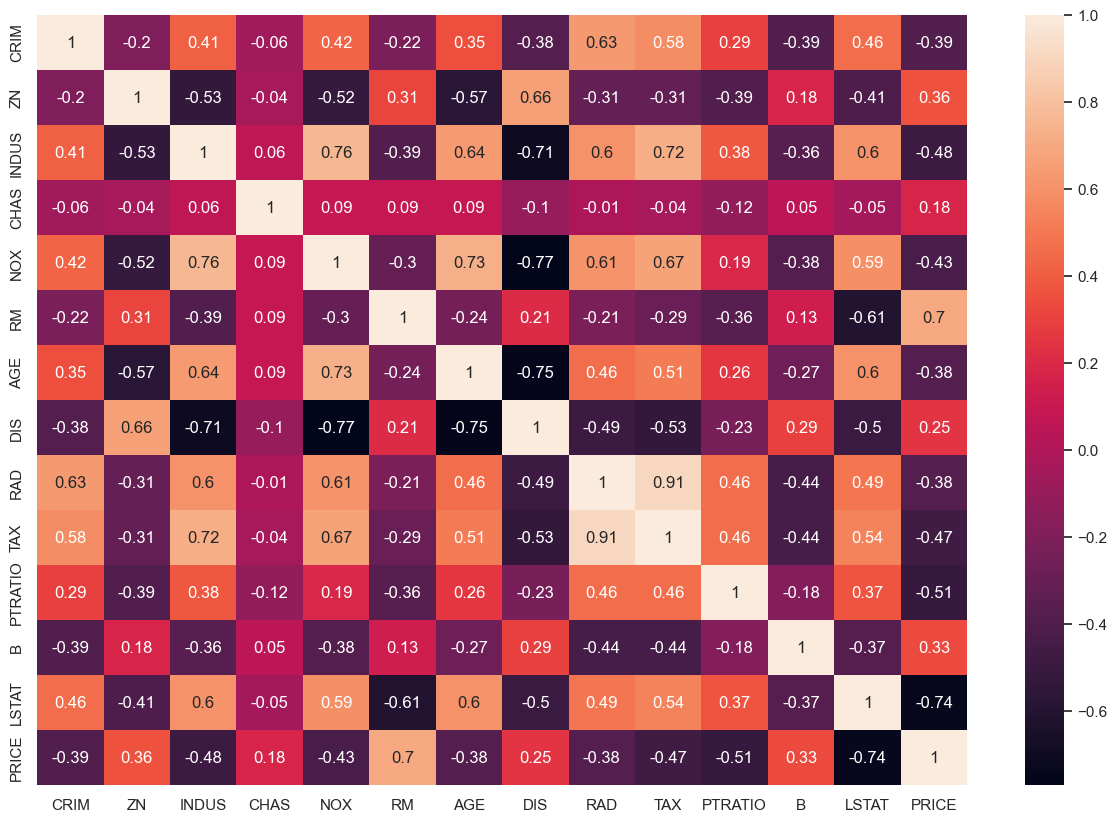

In [46]:
#Created a dataframe without the price col, since we need to see the correlation between the variables
# bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos.corr().round(2) #상관계수를 계산해줘.
sns.heatmap(data=correlation_matrix, annot=True) 
#heatmap 관계가 높다는 검은색, 밝은색 -> 진한 색깔이면 관계가 높다. 
#annot->계산한값을 그림에 그려줘.


#다중공산성 문제를 확인한것(왜냐하면 타겟은 빠져있기 때문에.)

In [47]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

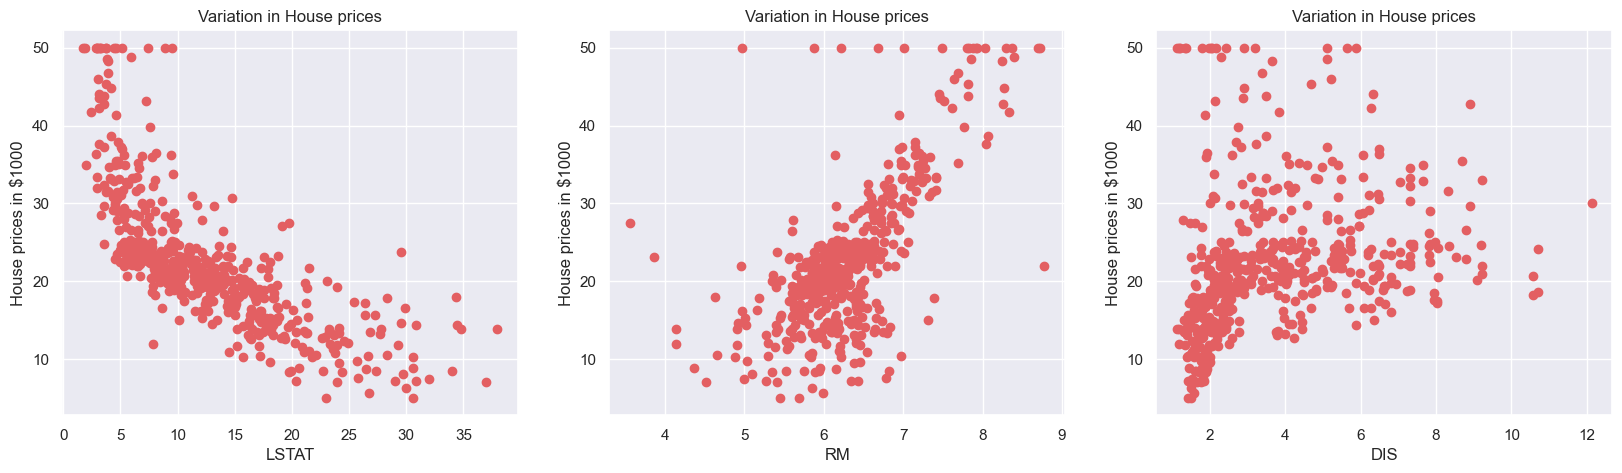

In [49]:
plt.figure(figsize=(20,5))

features=['LSTAT', 'RM', 'DIS']
target=bos['PRICE']
for i,col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x=bos[col]
    y=target
    plt.scatter(x,y,marker='o', color='#e35f62')
    plt.title('Variation in House prices')
    plt.xlabel(col)
    plt.ylabel('House prices in $1000')


- subplots는 flatten이 필요, 순서대로 펼쳐야함
- subplot이 훨씬 편함 (위)

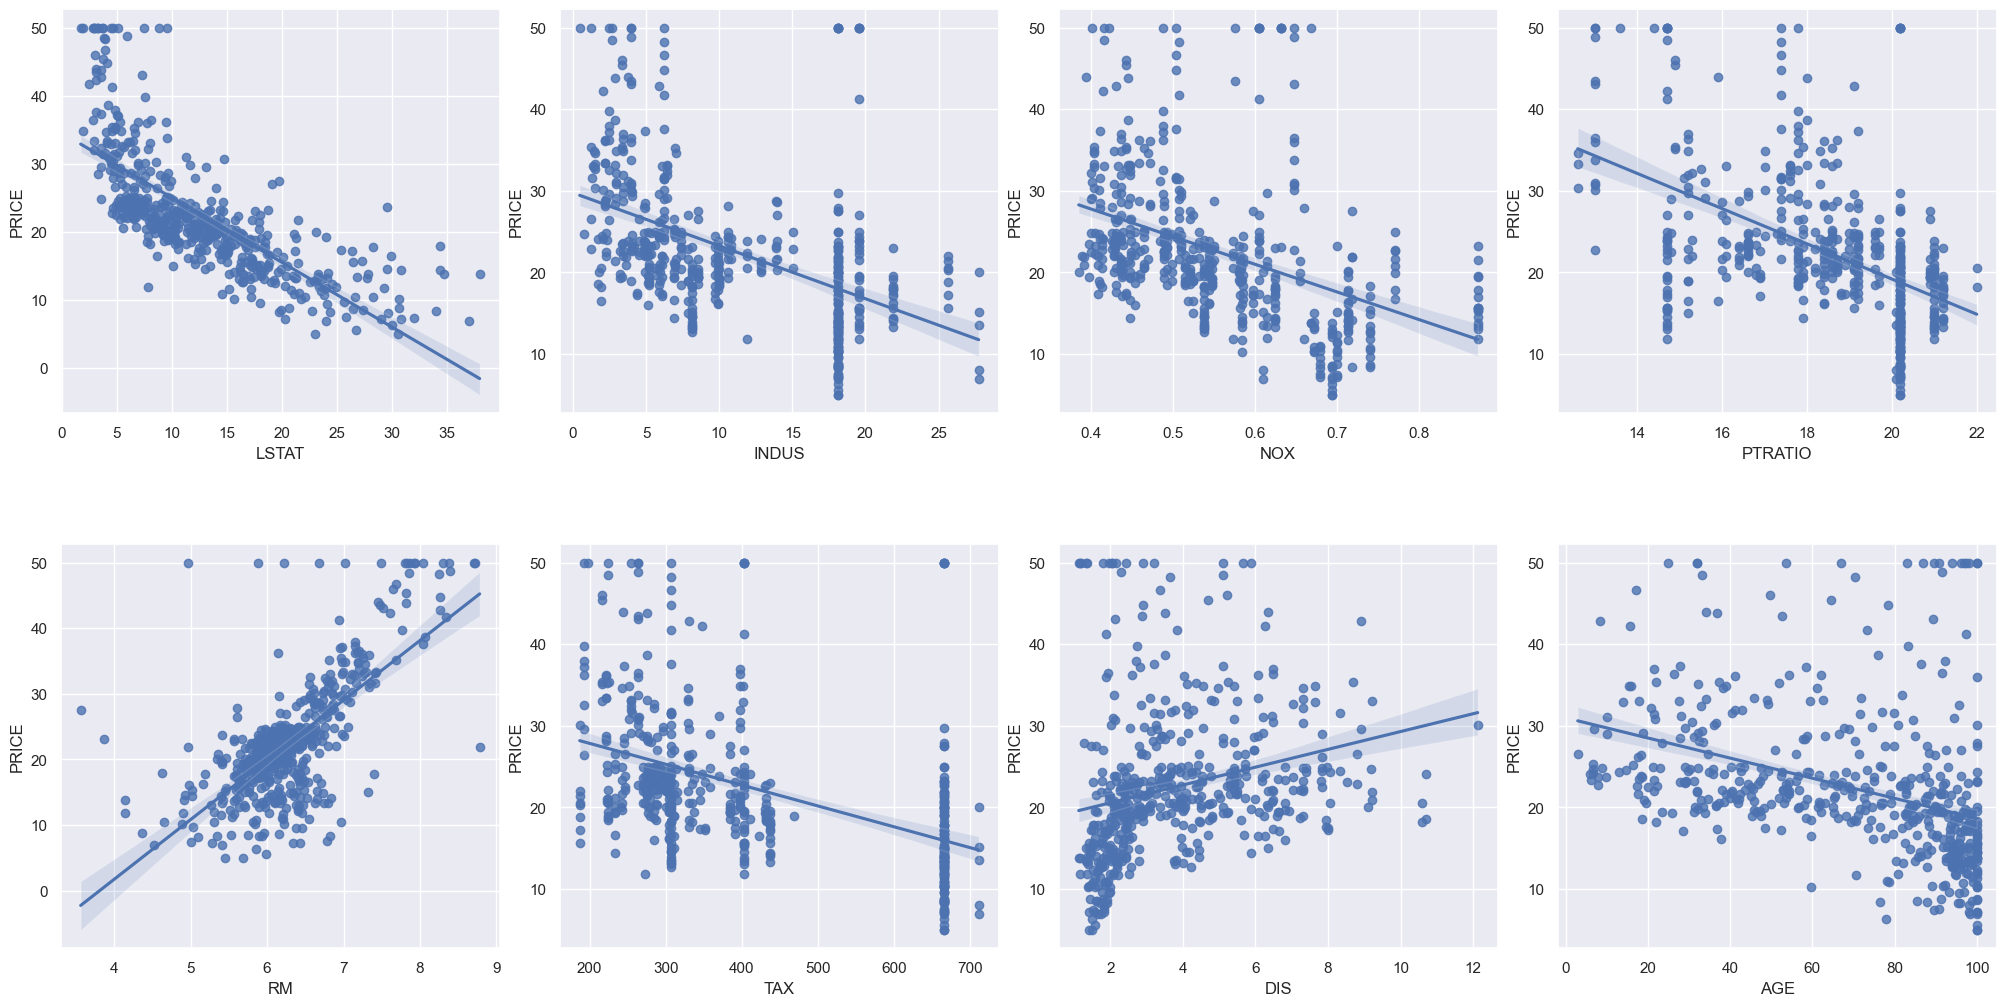

In [50]:
columns_sels=['LSTAT','INDUS', 'NOX', 'PTRATIO','RM','TAX','DIS','AGE']
x=bos.loc[:,columns_sels]
y=bos['PRICE']

fig,axes=plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index=0
axes=axes.flatten() # 
for i,k in enumerate(columns_sels):
    sns.regplot(y=y, x=x[k], ax=axes[i])
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [51]:
bos.RM.shape # 벡터

(506,)

In [53]:
bos.PRICE.shape # 벡터

(506,)

In [55]:
# 행렬로 바꾸기
X_rooms=bos.RM
y_price=bos.PRICE

X_rooms=np.array(X_rooms).reshape(-1,1)
y_price=np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_rooms,y_price, test_size=0.2,
                                               random_state=5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


- Sklearn의 Linear regression 클래스

**input parameter**
- fit_intercept : 불 값으로, default = True. Intercept(절편) 값을 계산할 것인지 말지를 지정함. 만일 False로 지정하면 Intercept가 사용되지 않고 0으로 지정됨.

- normalize : 불 값으로, 디폴트는 False임. fit_intercept가 False 인 경우에는 이 파라미터가 무시됨. 만일 True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화 함


**Features**

- coef_ : fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target 값 개수, 피쳐 개수)

- intercept_ : intercept 값


#다중 공성선 문제(multicollinearity problem)

## 참고 : 선형 회귀분석의 4가지 기본가정(https://kkokkilkon.tistory.com/175)

선형회귀의 가정은 4가지 정도가 있다.

1. 독립변수와 종속변수 간의 선형적인 관계를 가정한다.

2. 오차항은 정규분포를 따른다는 가정이다. (Normality)

3. 오차항은 등분산성을 가정한다.(Homoscedasticity)

4.  공분산성이 없다는 가정이다. (no multicollinearity) 

모형의 일부 설명 변수가 다른 설명 변수와 상관 정도가 높아, 데이터 분석 시 부정적인 영향을 미치는 현상을 말함.

-> 어처구니 없는 해석을 하게 만듬


- 피쳐 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐. 이러한 현상을 다중 공선성(Multi-collinearity) 


- RMSE(Root Mean Squared Error) :MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다  더 커지는 특성이 있으므로 MSE에 루트를 씌움.


## $R^2 = {\dfrac {예측값 ~~~ Variance} {실제값~~~Varivance} } $

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Train에 대한 평가
reg_1=LinearRegression()
reg_1.fit(X_train,y_train)

y_train_predict=reg_1.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train,y_train_predict))) # 루트씌운거
r2=round(reg_1.score(X_train,y_train),2) # 직선이 겹쳐지면 1, 아니면 -1,

print('The model performance for training set')
print('--------------------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.43




In [60]:
# model evaluation for test set
y_pred=reg_1.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
r2=round(reg_1.score(X_test,y_test),2)

print('The model performance for training set')
print('--------------------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')
# 적합한 모델이 아님 못맞춤

The model performance for training set
--------------------------------------
RMSE is 4.895963186952216
R2 score is 0.69




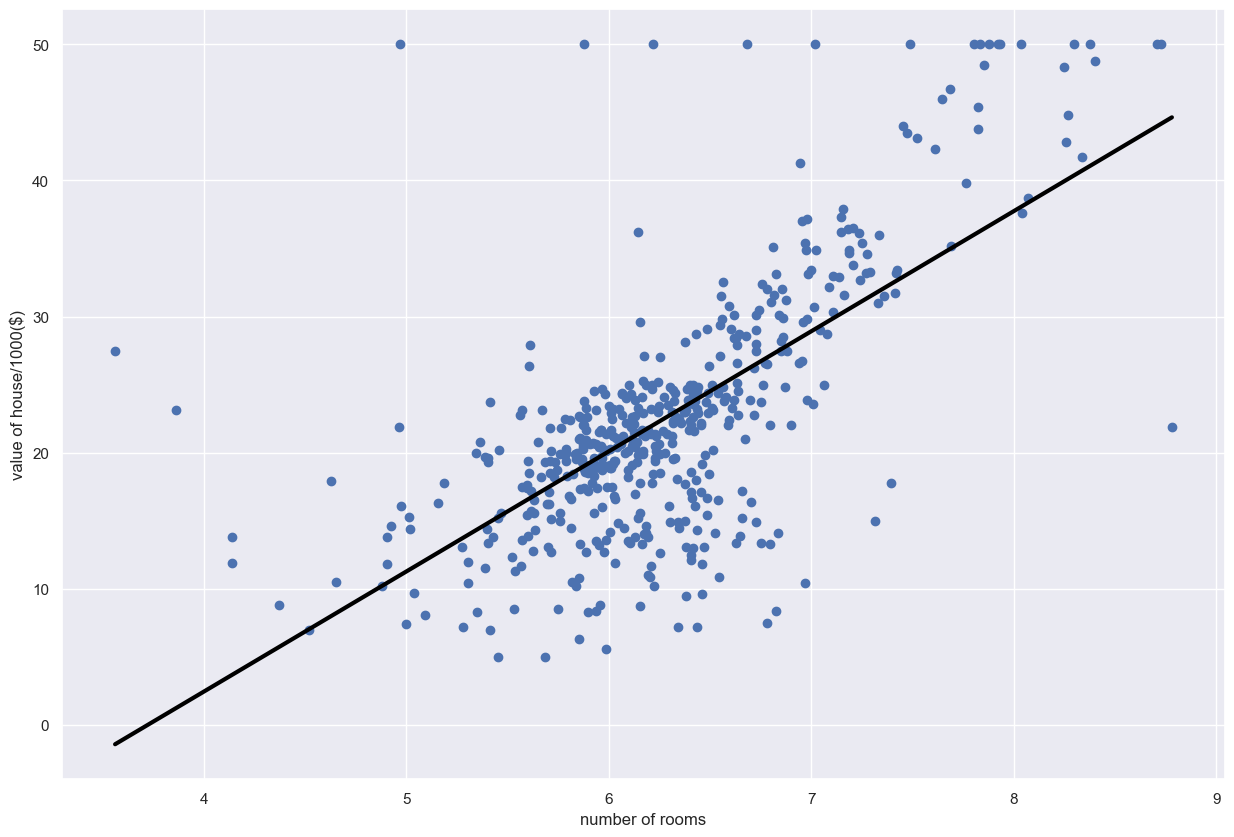

In [62]:
prediction_space=np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space),color='black',
         linewidth=3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

### Regression Model for all the variables

In [64]:
X=bos.drop('PRICE', axis=1) # 원본데이터에는 price가 남아있음 inplace(완전삭제)
y=bos['PRICE']

In [66]:
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,
                                                random_state=42)

In [67]:
reg_all=LinearRegression()
reg_all.fit(X_train,y_train)

LinearRegression()

In [69]:
# model evaluation for training set

y_train_predict=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train,y_train_predict)))
r2=round(reg_all.score(X_train,y_train),2)

print('The model performance for training set')
print('--------------------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75




In [70]:
# model evaluation for test set

y_test_predict=reg_all.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test,y_test_predict)))
r2=round(reg_all.score(X_test,y_test),2)

print('The model performance for training set')
print('--------------------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

The model performance for training set
--------------------------------------
RMSE is 4.928602182665371
R2 score is 0.67




- 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

# boston 데이타셋 로드
boston=load_boston()

In [84]:
bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE']=boston.target
print('Boston 데이터셋 크기',bostonDF.shape)
bostonDF

Boston 데이터셋 크기 (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
보스턴
데이터 불러오기
데이터프레임
타겟
xy 설정
스케터
트레인
테스트
오차

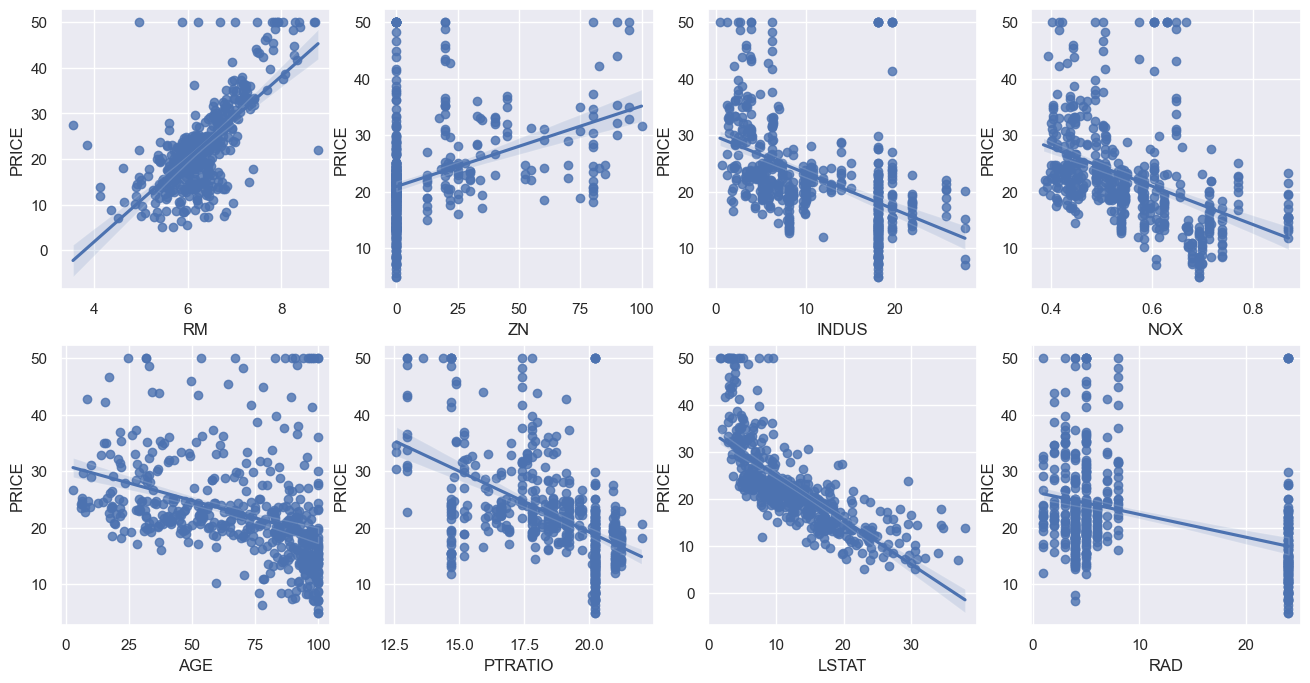

In [86]:
fig,axs=plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features=['RM','ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features): # 8개 범위
    row=int(i/4) # 1 or 2가 나옴(4,8)
    col=i%4
    # seaborn의 regplot을 이용해 산점도와 회귀 작성을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col]) # 자리를 고정해 두고 그림(4,2)
    # flatten()은 먼저 그리고 자리 위치 배열함

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_data, y_target, test_size=0.3,
                                                  random_state=156)

# linear Regression OLS(ordinary Least Square(OLS)method) 
# error function을 gradient method로 학습/예측/평가 수행
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score:{0:.3f}'.format(r2_score(y_test,y_preds)))

MSE:17.297, RMSE:4.159
Variance score:0.757


In [91]:
print('절편 값:', lr.intercept_)
print('회귀계수값:', np.round(lr.coef_,1))

절편 값: 40.995595172164435
회귀계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [92]:
# 회귀계수를 큰 값 순으로 정렬하기 위해 Series로 생성, index가 컬럼명에 유의
coeff=pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)
# 회귀계수값이 클수록 종속변수에 영향을 끼치나 다중공선성(계수분산이 커짐) 문제 고려해야함. 

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64